In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('../data/raw/fraud_data.csv')

In [3]:
def get_age_trans_time(year, bd):
        return year - bd
        
def get_age(df):
    df['year_trans'] = df['trans_date_trans_time'].apply(lambda t: int(t[6:10]))
    df['bt_year'] = df['dob'].apply(lambda bd: int(bd[-4:]))
    df['age_trans_time'] = df.apply(lambda x: get_age_trans_time(x.year_trans, x.bt_year), axis=1)
    df['dob'].apply(lambda bd: datetime.now().year - int(bd[-4:]))
    return df

def get_age_categorical(df):
    def age_cat(x):
        if x < 18:
            return '0-18'
        elif x < 35:
            return '18-35'
        elif x < 60:
            return '35-60'
        else:
            return '60+'
    df['age_cat'] = df['age_trans_time'].apply(lambda x: age_cat(x))
    return df

In [4]:
df = get_age_categorical(get_age(df))

In [6]:
label = df['is_fraud']
df = df.iloc[label[label.isin(['0', '1'])].index] 

/home/mrpink/Documentos/estudos/case_clear_sale/cs_fd_env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/mrpink/Documentos/estudos/case_clear_sale/cs_fd_env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 64.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


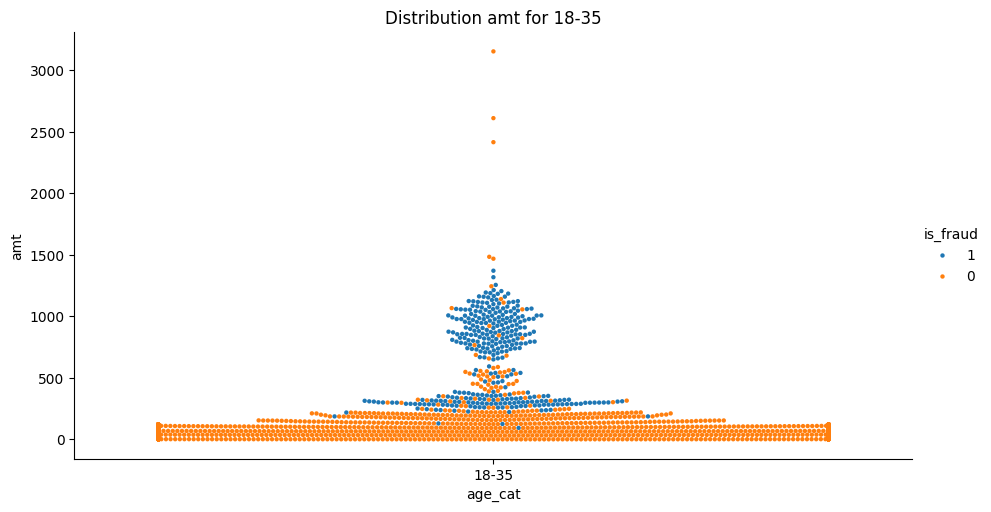

/home/mrpink/Documentos/estudos/case_clear_sale/cs_fd_env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/mrpink/Documentos/estudos/case_clear_sale/cs_fd_env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 66.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/mrpink/Documentos/estudos/case_clear_sale/cs_fd_env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 65.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


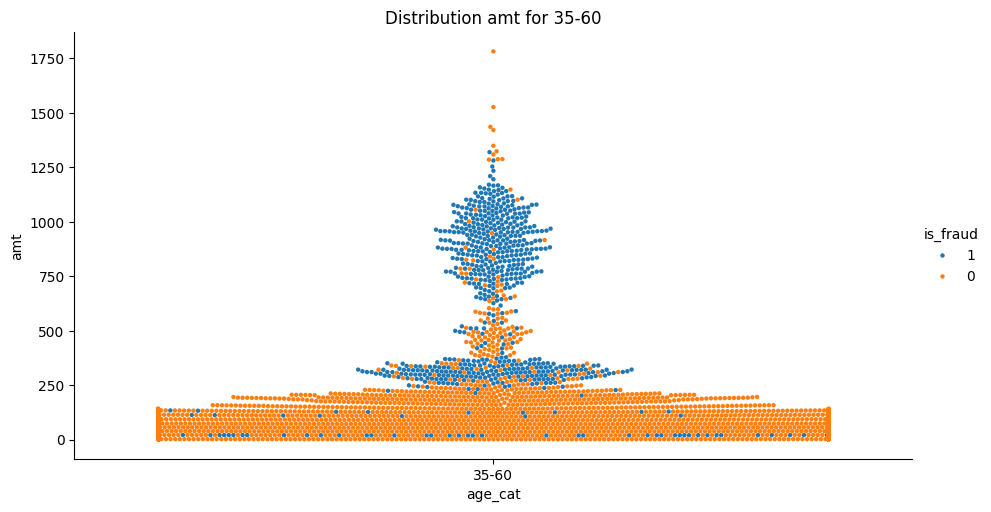

/home/mrpink/Documentos/estudos/case_clear_sale/cs_fd_env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 62.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/mrpink/Documentos/estudos/case_clear_sale/cs_fd_env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


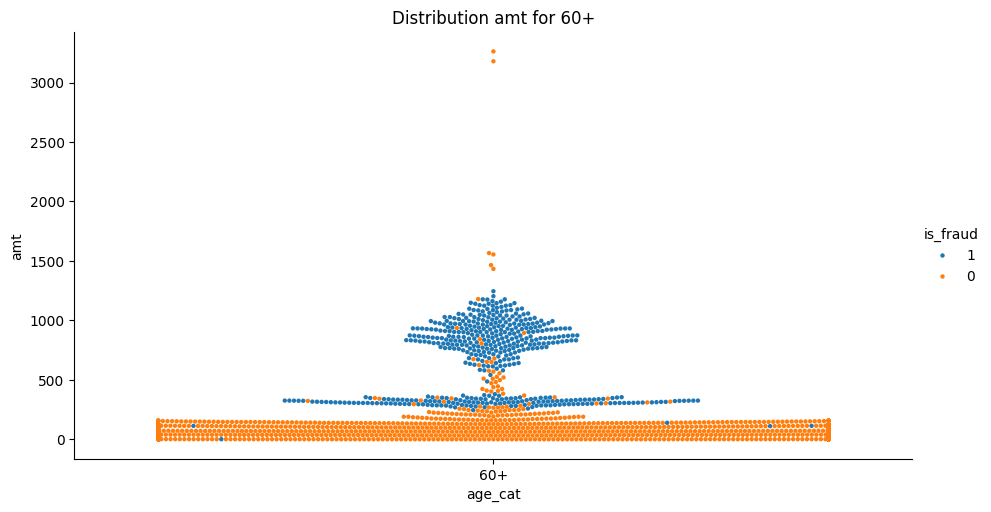

In [8]:
# Distribution of category columns with seaborn
def plot_cat_distribution(df, **kwargs):
    var_plots = kwargs.get('var_plots')['age_cat']
    for age in var_plots:
        df_plot = df[['amt', 'is_fraud', 'age_cat']]
        df_plot = df_plot[df_plot['age_cat']==age] 
        sns.catplot(df_plot, x='age_cat', y='amt', s=10, kind='swarm', hue='is_fraud', aspect=11.7/6.27)
        plt.title(f'Distribution amt for {age}')
        plt.show()

plot_cat_distribution(df, var_plots={'age_cat': ['18-35', '35-60', '60+']})

**Distributions**

CA


/home/mrpink/Documentos/estudos/case_clear_sale/cs_fd_env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/mrpink/Documentos/estudos/case_clear_sale/cs_fd_env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 43.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


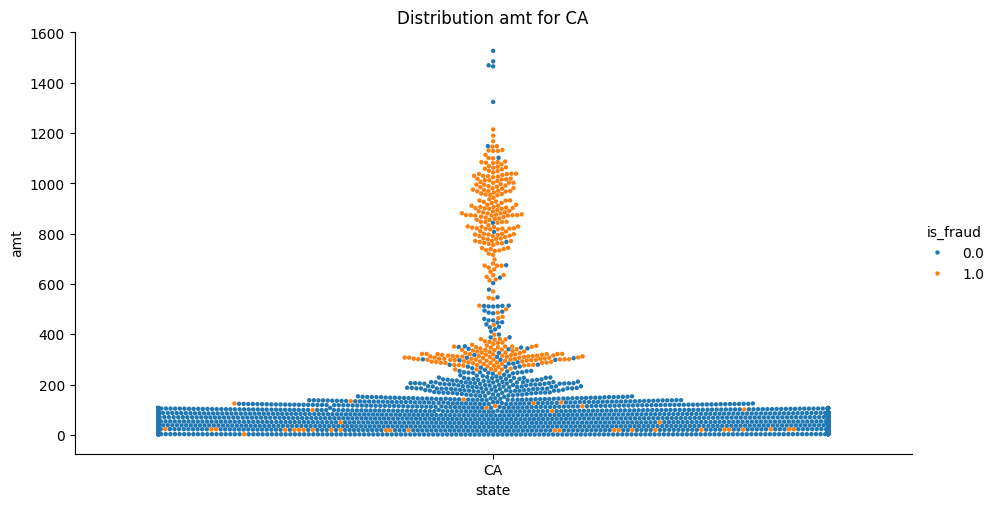

AK


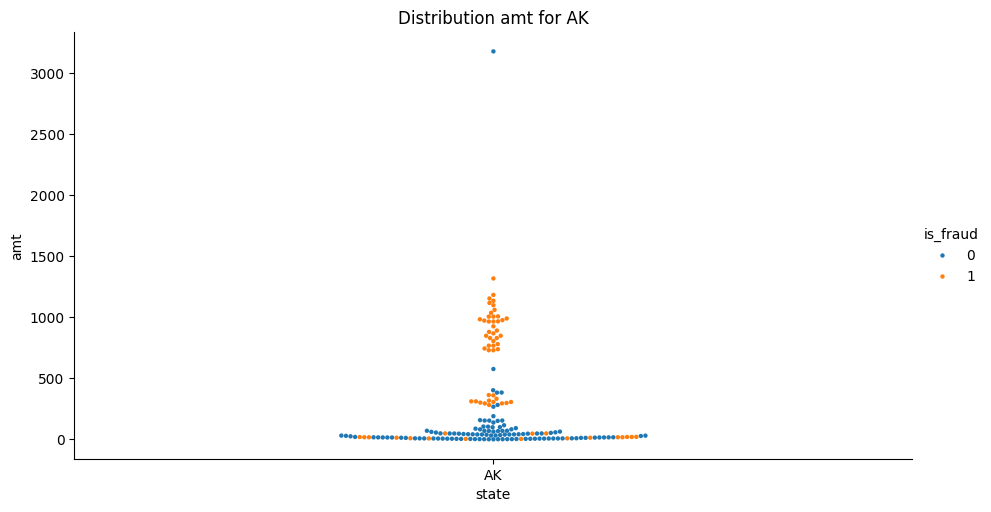

In [21]:
# Distribution of category columns with seaborn
def plot_cat_distribution(df, **kwargs):
    var_plots = kwargs.get('var_plots')['state']
    for state in var_plots:
        print(state)
        df = pd.read_csv(f'../data/processed/train_{state}_simp.csv')
        df_plot = df[['amt', 'is_fraud', 'state']]
        df_plot = df_plot[df_plot['state'].isin([state])]
        sns.catplot(df_plot, x='state', y='amt', s=10, kind='swarm', hue='is_fraud', aspect=11.7/6.27)
        plt.title(f'Distribution amt for {state}')
        plt.show()
        
plot_cat_distribution(df, var_plots={'state': ['CA', 'AK']})